# Quickstart: science data

load a single quadrant Science image and get the full focal plane !

This tutorial makes use of `ztfquery` for the data I/O. 

***
## Load data

let's say you want the file `ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits`. Given the name, it is an observation of field 655, taken the 24th of September 2020 with the **ztf:r** filter. `ztfquery` knows how to fetch the filepath from your computer given its name, and, if it does not exists, will download it for you. Do enable that, set the `as_path=False` option of the `from_filename()` method.

In [1]:
import ztfimg

In [10]:
img = ztfimg.ScienceQuadrant.from_filename("ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits",
                                   as_path=False)

Note on `as_path`: **as_path=True** means *I gave you the exact filepath location* ; **as_path=False** means: *ztfquery, this is the filename, look for it and download it if necessary*. Remark that, if you indeed provided the fulpath but set as_path=False, this will work as long as the fullpath is where the file should be given the ztf data environment.

***
## Data

The `get_data()` method enables you to access the data either as stored in the first file, or corrected for background or mask.

In [11]:
data_as_stored = img.get_data()
data_as_stored

array([[156.70863 , 157.65231 , 160.41643 , ..., 133.77336 ,  83.76391 ,
         12.984478],
       [155.4496  , 147.19606 , 161.0656  , ..., 134.86244 ,  83.728935,
         10.205329],
       [154.41986 , 159.50085 , 165.22946 , ..., 139.25365 ,  76.01857 ,
         16.900919],
       ...,
       [167.03732 , 154.78484 , 148.68439 , ..., 152.8368  ,  87.123825,
         17.609827],
       [158.07927 , 149.92209 , 152.68452 , ..., 138.10672 ,  78.78005 ,
         16.670918],
       [194.94452 , 196.35838 , 185.91528 , ..., 206.81393 , 167.88715 ,
         44.91321 ]], dtype=float32)

remove the background (see `get_background()`)

In [12]:
data_no_back = img.get_data(rm_bkgd=True)
data_no_back

array([[  -0.72146606,    0.22221375,    2.9863281 , ...,  -23.656738  ,
         -73.66619   , -144.44562   ],
       [  -1.9804993 ,  -10.234039  ,    3.635498  , ...,  -22.567657  ,
         -73.701164  , -147.22478   ],
       [  -3.0102386 ,    2.070755  ,    7.799362  , ...,  -18.176453  ,
         -81.41153   , -140.52917   ],
       ...,
       [   9.6072235 ,   -2.6452637 ,   -8.745712  , ...,   -4.593292  ,
         -70.306274  , -139.82027   ],
       [   0.6491699 ,   -7.508011  ,   -4.745575  , ...,  -19.32338   ,
         -78.65005   , -140.75919   ],
       [  37.51442   ,   38.928284  ,   28.485184  , ...,   49.383835  ,
          10.4570465 , -112.51689   ]], dtype=float32)

and mask back pixels (see `get_mask()`)

In [13]:
data_clean = img.get_data(apply_mask=True, rm_bkgd=True)
data_clean

array([[  -0.72146606,    0.22221375,    2.9863281 , ...,  -23.656738  ,
         -73.66619   , -144.44562   ],
       [  -1.9804993 ,  -10.234039  ,    3.635498  , ...,  -22.567657  ,
         -73.701164  , -147.22478   ],
       [  -3.0102386 ,    2.070755  ,    7.799362  , ...,  -18.176453  ,
         -81.41153   , -140.52917   ],
       ...,
       [   9.6072235 ,   -2.6452637 ,   -8.745712  , ...,   -4.593292  ,
         -70.306274  , -139.82027   ],
       [   0.6491699 ,   -7.508011  ,   -4.745575  , ...,  -19.32338   ,
         -78.65005   , -140.75919   ],
       [  37.51442   ,   38.928284  ,   28.485184  , ...,   49.383835  ,
          10.4570465 , -112.51689   ]], dtype=float32)

***
## Plotting

The `show()` method display the image. By default it show the data as stored, but you can directly provide the data you want to show.

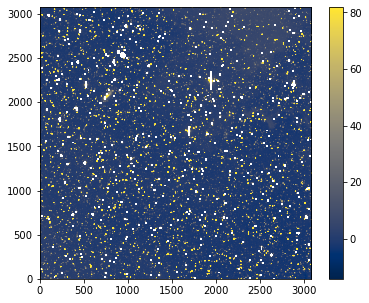

In [14]:
fig = img.show(data=data_clean)

***
## RA, Dec <-> x,y 

This data contains UGC 2885 (58.2599, 35.5903). Let's use the `radec_to_xy()` method to convert ra, dec (deg) coordinates into x, y data positions. 

In [17]:
x, y = img.radec_to_xy(58.2599, 35.5903) # radec_to_xy accepts (and returns) array
x, y

(array([761.55768087]), array([2071.92390505]))

let's now do a cutout 100x100 around this location on the cleaned science image.

*careful* in numpy x and y are inverted as numpy is matrix (not plot) oriented

In [28]:
data_clean = img.get_data(apply_mask=True, rm_bkgd=True)

In [30]:
cutout = data_clean[int(y[0]-100):int(y[0]+100), 
                    int(x[0]-100):int(x[0]+100)]

Show it with a usual matplotlib plot

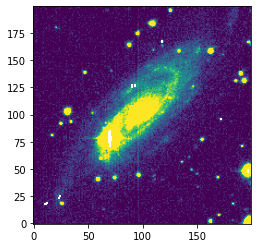

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(cutout, origin="lower", vmax=80, vmin=0)

or simply use the `show()` method

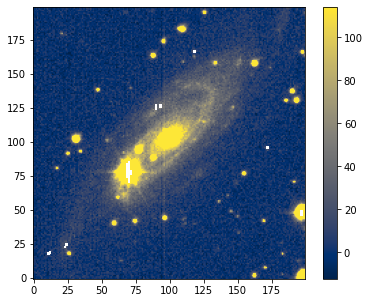

In [39]:
# vmax or vmin as string means 'percent of data'
fig = img.show(data=cutout, vmax="98") 